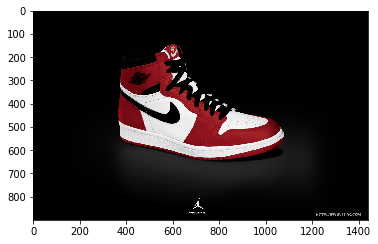

In [14]:
import copy
import numpy as np
import scipy.ndimage as ndimage
from matplotlib import pyplot as plt
import imageio
import time

class ScipyAugmentor:
    def __init__(self, cfg, **kwargs):
        self.cfg = cfg


    def aug_image(self, image, **kwargs):
        
        image = ndimage.gaussian_filter(image, 1.0, order=0, output=None, mode="reflect", cval=0.0, truncate=4.0)
        image = ndimage.gaussian_laplace(image, 1.0, output=None, mode="reflect", cval=0.0, **kwargs)
        image = ndimage.laplace(image, output=None, mode="reflect", cval=0.0)
        image = ndimage.maximum_filter1d(image, 3, axis=-1, output=None, mode="reflect", cval=0.0, origin=0)
        image = ndimage.median_filter(image, size=3, footprint=None, output=None, mode="reflect", cval=0.0, origin=0)
        image = ndimage.minimum_filter(image, size=3, footprint=None, output=None, mode="reflect", cval=0.0, origin=0)
        image = ndimage.affine_transform(image, np.array([[0.9,0,1], [0.1,0.8,0], [0,0,1]]), offset=0.0, output_shape=None, output=None, order=3, mode="constant", cval=0.0, prefilter=True)
        image = ndimage.rotate(image, 30, axes=(1, 0), reshape=True, output=None, order=3, mode="constant", cval=0.0, prefilter=True)
        image = ndimage.zoom(image, zoom=1.05, output=None, order=3, mode="constant", cval=0.0, prefilter=True)
        
        
        
        return image
    
scipyAugmentor = ScipyAugmentor(None)
org_image = imageio.imread("../data/01.jpg")
plt.imshow(org_image)

image augmentation is done!


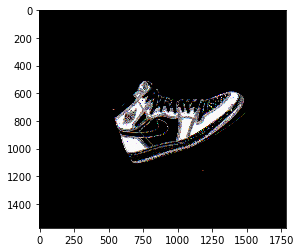

In [16]:
# image
aug_img = scipyAugmentor.aug_image(org_image)
plt.imshow(aug_img.astype(np.uint8))
print("image augmentation is done!")